In [4]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

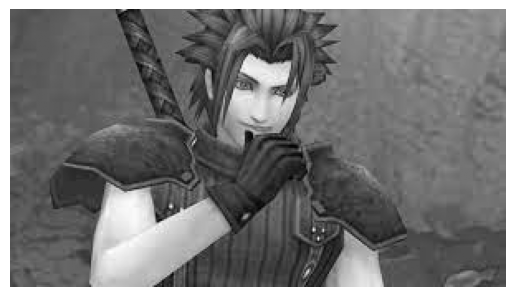

In [5]:
img = cv.imread('zack.jpg')
zack = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(zack, cmap='gray')
plt.axis('off')
plt.show()

## array1. Load and View a Grayscale Image

### What does the array representation of the image look like?

In [6]:
arr = np.array(zack)
arr

array([[ 83,  83,  82, ..., 132, 131, 131],
       [ 83,  82,  82, ..., 131, 131, 131],
       [ 82,  82,  81, ..., 131, 131, 130],
       ...,
       [ 69,  69,  72, ...,  68,  68,  68],
       [ 70,  65,  63, ...,  74,  74,  74],
       [ 71,  63,  58, ...,  80,  80,  80]], shape=(168, 300), dtype=uint8)

### What is the shape, data type, and pixel range?

In [7]:

print(f"CV2 Image format: {zack.dtype}, size: {zack.shape}, mode: {zack.ndim}")

CV2 Image format: uint8, size: (168, 300), mode: 2


## 2. Brighten the Image

In [8]:
brightened = (zack + 50)

### How does the image change?

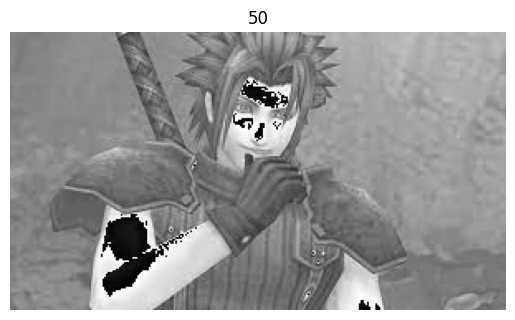

In [9]:
plt.imshow(brightened, cmap='gray')
plt.title("50")
plt.axis('off')
plt.show()

#### some pixels are now black

### What happens if a pixel value exceeds 255?

#### it becomes 0 and turns black

## 3. Add a Higher Value

In [10]:
brightened2 = (zack + 300)

OverflowError: Python integer 300 out of bounds for uint8

In [ ]:
plt.imshow(brightened2, cmap='gray')
plt.axis('off')
plt.title("300")
plt.show()

NameError: name 'brightened2' is not defined

### Do you get the result you expect?

#### I expected more dark pixels but i got an error

### Can you explain what’s going wrong?

#### the value 300 is more than 255 so it cant store it

### Try using np.clip() to keep values between 0 and 255

In [11]:
brightened3 = np.clip(zack.astype(np.int32) + 300, 0, 255).astype(np.uint8)

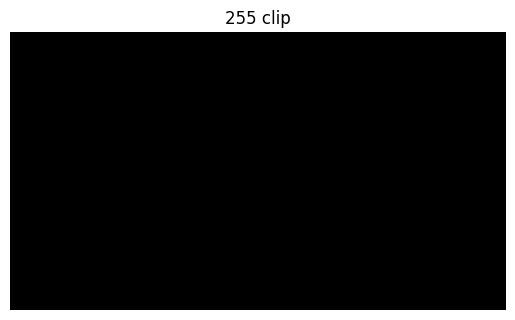

In [12]:
plt.imshow(brightened3, cmap='gray')
plt.axis('off')
plt.title("255 clip")
plt.show()

#### it urned all dark its probably all 256 now

## 4. Subtract to Darken

In [13]:
darkened = (zack - 100).astype(np.uint8)

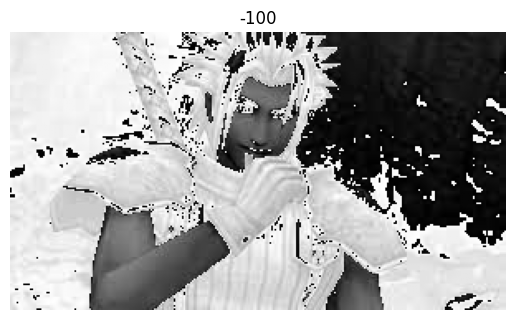

In [14]:
plt.imshow(darkened, cmap='gray')
plt.axis('off')
plt.title("-100")
plt.show()

### What happens to the dark regions?

#### they turned bright

### Are any values going below 0?

In [15]:
arr = np.array(darkened)
arr

array([[239, 239, 238, ...,  32,  31,  31],
       [239, 238, 238, ...,  31,  31,  31],
       [238, 238, 237, ...,  31,  31,  30],
       ...,
       [225, 225, 228, ..., 224, 224, 224],
       [226, 221, 219, ..., 230, 230, 230],
       [227, 219, 214, ..., 236, 236, 236]], shape=(168, 300), dtype=uint8)

#### no they became went cack to 255 like a aloop

### Use .clip(0, 255) to fix underflow and observe the difference.

In [16]:
darkened2 = np.clip(zack.astype(np.int32) - 100, 0, 255).astype(np.uint8)

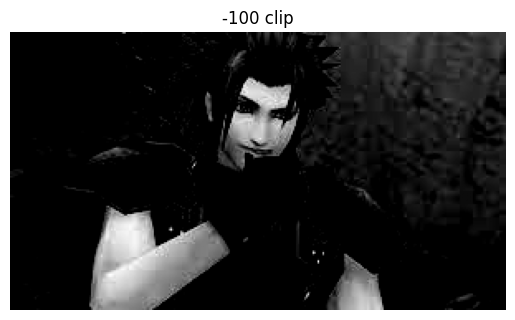

In [17]:
plt.imshow(darkened2, cmap='gray')
plt.axis('off')
plt.title("-100 clip")
plt.show()

In [18]:
arr = np.array(darkened2)
arr

array([[ 0,  0,  0, ..., 32, 31, 31],
       [ 0,  0,  0, ..., 31, 31, 31],
       [ 0,  0,  0, ..., 31, 31, 30],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], shape=(168, 300), dtype=uint8)

#### it seems the there are no longer any bright spots and it dosent go below 0
#### the image is a lot darker now as well

## 5. Transpose the Image

In [19]:
transposed = zack.T

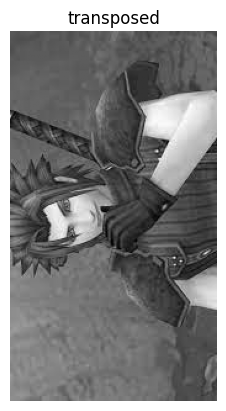

In [20]:
plt.imshow(transposed, cmap='gray')
plt.axis('off')
plt.title("transposed")
plt.show()

### What happens to the orientation of the image?

#### it fliped to the left

### Does this feel like a flip, a rotation, or something else?

#### a rotation sounds about right

## 6. Flip the Image Horizontally and Vertically

In [21]:
flipped_lr = np.fliplr(zack)
flipped_ud = np.flipud(zack)

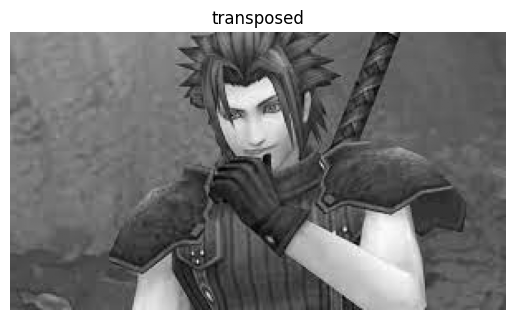

In [22]:
plt.imshow(flipped_lr, cmap='gray')
plt.axis('off')
plt.title("transposed")
plt.show()

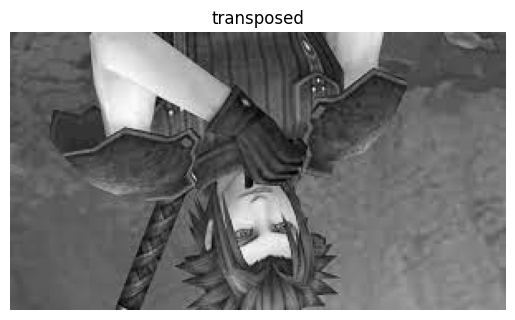

In [23]:
plt.imshow(flipped_ud, cmap='gray')
plt.axis('off')
plt.title("transposed")
plt.show()

### How do these flips affect the image visually?

#### left-right made the image face the left diraction while up-down filpped it upside down

### How do these flips affect the image visually?

#### its simply a change of diraction with no other visual changes 

### How are they different from transpose?

#### transpose rotate the image but flip take it to the other diraction

## 7. Slice (Crop) a Section of the Image

In [25]:
h, w = zack.shape
start_y = h // 2 - 50
start_x = w // 2 - 50

center_crop = zack[start_y:start_y + 100, start_x:start_x + 100]


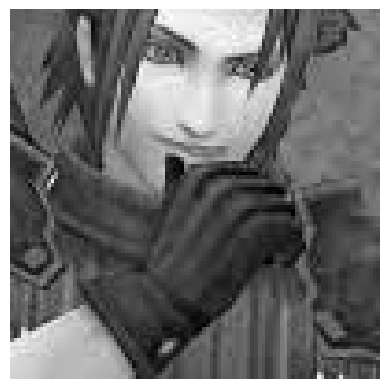

In [26]:
plt.imshow(center_crop, cmap='gray')
plt.axis('off')
plt.show()

### What part of the image are you extracting?

#### the center part of the image

#### Try slicing other regions — top-left, bottom-right, etc.

In [39]:
bottom_right = zack[-100:, -100:]
top_right = zack[0:100, -100:]
bottom_left = zack[-100:, 0:100]
top_left = zack[0:100, 0:100]


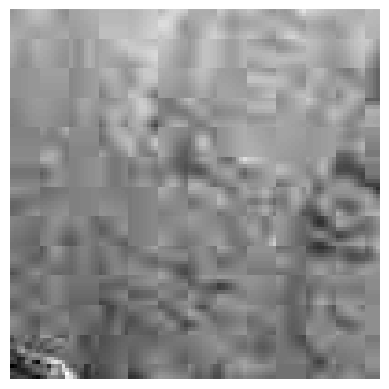

In [41]:
plt.imshow(top_right, cmap='gray')
plt.axis('off')
plt.show()

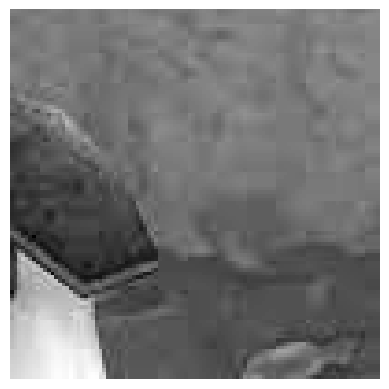

In [38]:
plt.imshow(bottom_right, cmap='gray')
plt.axis('off')
plt.show()

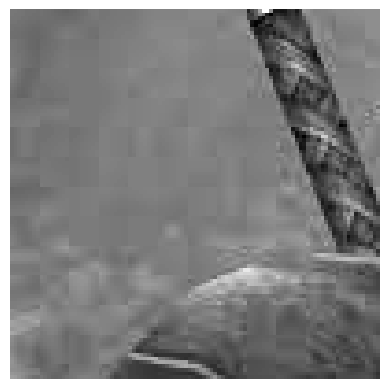

In [40]:
plt.imshow(top_left, cmap='gray')
plt.axis('off')
plt.show()

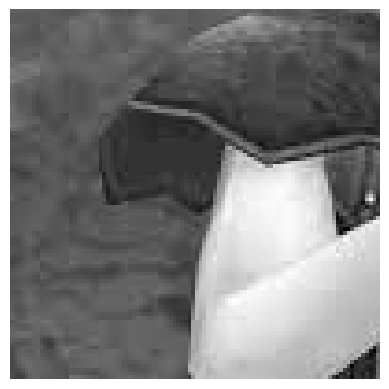

In [37]:
plt.imshow(bottom_left, cmap='gray')
plt.axis('off')
plt.show()

## 8. Create a Negative Image

In [43]:
negative = 255 - zack

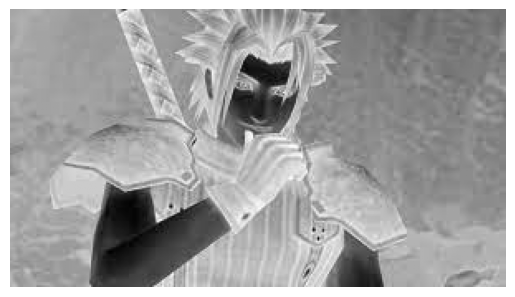

In [44]:
plt.imshow(negative, cmap='gray')
plt.axis('off')
plt.show()

### What do brighter and darker areas become?

#### the oppistae of each other

### What kind of images could this be useful for?

#### to find details that you cant usually notice

## 9. Rotate the Image

In [50]:
rotated_90 = np.rot90(zack, k=1)

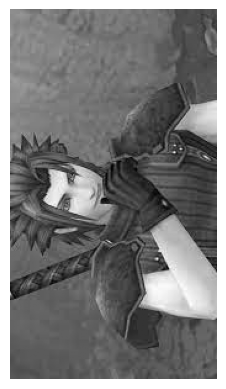

In [51]:
plt.imshow(rotated_90, cmap='gray')
plt.axis('off')
plt.show()

### Try different values of k (1, -1, 2, etc.).

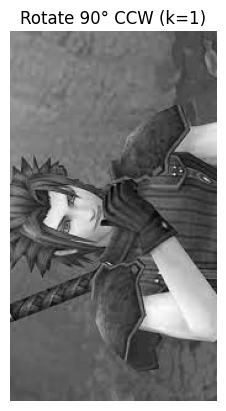

In [53]:
rotated_90 = np.rot90(zack, k=1)
plt.imshow(rotated_90, cmap='gray')
plt.axis('off')
plt.title('Rotate 90° CCW (k=1)')
plt.show()


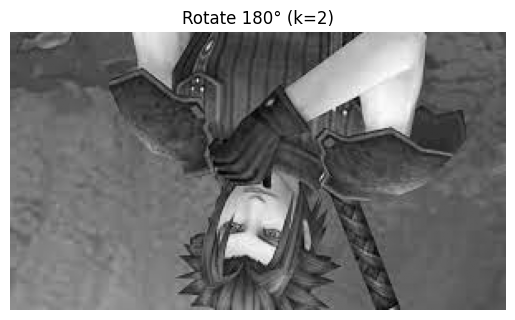

In [54]:
rotated_180 = np.rot90(zack, k=2)
plt.imshow(rotated_180, cmap='gray')
plt.axis('off')
plt.title('Rotate 180° (k=2)')
plt.show()


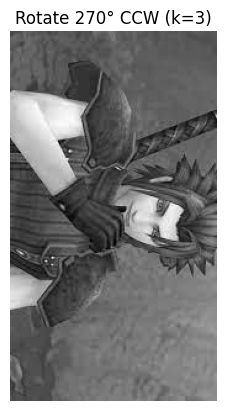

In [55]:
rotated_270 = np.rot90(zack, k=3)
plt.imshow(rotated_270, cmap='gray')
plt.axis('off')
plt.title('Rotate 270° CCW (k=3)')
plt.show()


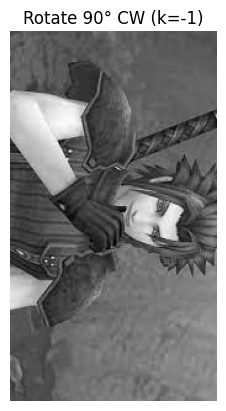

In [56]:
rotated_cw = np.rot90(zack, k=-1)
plt.imshow(rotated_cw, cmap='gray')
plt.axis('off')
plt.title('Rotate 90° CW (k=-1)')
plt.show()


### How does this differ from transpose and flip?

#### here it looks like its both transpose and flip at the same time

## 10. Combine Multiple Transformations

### Crop the center of the image.

In [61]:
crop_h, crop_w = 100, 100
h, w = zack.shape

start_y = (h - crop_h) // 2
start_x = (w - crop_w) // 2

center_crop = zack[start_y:start_y + crop_h, start_x:start_x + crop_w]


### Flip the cropped section horizontally.

In [63]:
flipped_crop = np.fliplr(center_crop)

### Brighten the result.

In [65]:
brightened = np.clip(flipped_crop.astype(int) + 50, 0, 255).astype(np.uint8)

### Display the final transformation

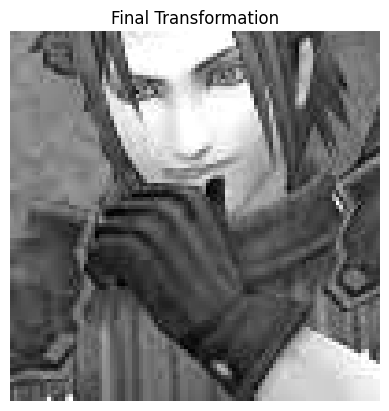

In [67]:
plt.imshow(brightened, cmap='gray')
plt.axis('off')
plt.title("Final Transformation")
plt.show()

### How does each transformation affect the image?

#### crop remove dedistractions from the part we want
#### flip has no special or important effect other than visualy 
#### brightning make some areas (dark areas) more clear 

### Does the order of operations matter? Why?

#### yes for example if we flip before croping depending on the image we may crop the wrong part 